# Keras Image Application - Ensemble 학습

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

In [3]:
from google.colab import files
up = files.upload()

Saving animals.zip to animals.zip


In [6]:
!unzip animals.zip -d animals

Archive:  animals.zip
  inflating: animals/bear.jpg        
  inflating: animals/crocodile.jpg   
  inflating: animals/dolphin.jpg     
  inflating: animals/eagle.jpg       
  inflating: animals/elephant.jpg    
  inflating: animals/hawk.jpg        
  inflating: animals/lion.jpg        
  inflating: animals/penguin.jpg     
  inflating: animals/shark.jpg       
  inflating: animals/sparrow.jpg     


In [7]:
vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()

179648224/179648224 [==============================] - 8s 0us/step


In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height) // 2
    final_img = new_img[:, diff:diff+IMAGE_SIZE, :] if width > height else new_img[diff:diff+IMAGE_SIZE, :, :]
    return final_img

- 10개 이미지에 대한 예측

In [12]:
from glob import glob

results = []
for fname in glob('animals/*.jpg'):
    name = fname.split('/')[1].split('.')[0]    # animals/bear.jpg --> bear
    img = center_image(Image.open(fname))
    yhat_v16 = vgg16.predict(img.reshape(1,224,224,3), verbose=0)
    yhat_v19 = vgg19.predict(img.reshape(1,224,224,3), verbose=0)
    yhat_r50 = resnet50.predict(img.reshape(1,224,224,3), verbose=0)
    yhat_r101 = resnet101.predict(img.reshape(1,224,224,3), verbose=0)
    yhat_ens = (yhat_v16 + yhat_v19 + yhat_r50 + yhat_r101) / 4

    pred_v16 = decode_predictions(yhat_v16)[0][0][1]
    pred_v19 = decode_predictions(yhat_v19)[0][0][1]
    pred_r50 = decode_predictions(yhat_r50)[0][0][1]
    pred_r101 = decode_predictions(yhat_r101)[0][0][1]
    pred_ens = decode_predictions(yhat_ens)[0][0][1]
    results.append([name, pred_v16, pred_v19, pred_r50, pred_r101, pred_ens])

- 결과 확인

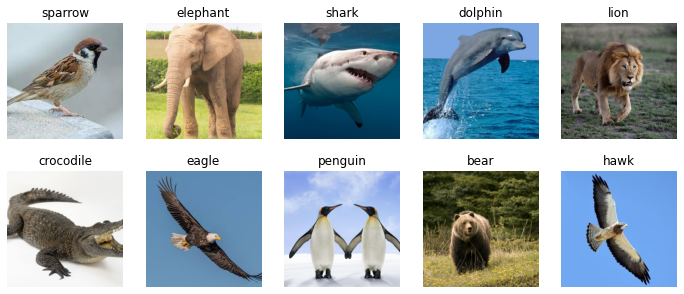

In [13]:
plt.figure(figsize=(12,5))
for i, fname in enumerate(glob('animals/*.jpg')):
    plt.subplot(2, 5, i+1)
    plt.imshow(center_image(Image.open(fname)))
    plt.title(fname.split('/')[1].split('.')[0])
    plt.axis('off')
plt.show()

In [14]:
import pandas as pd

df = pd.DataFrame(results, columns=['Name','VGG16','VGG19','ResNet50','ResNet101','Ensemble'])
df

,Name,VGG16,VGG19,ResNet50,ResNet101,Ensemble
0,sparrow,quail,jay,chickadee,jay,jay
1,elephant,African_elephant,African_elephant,African_elephant,African_elephant,African_elephant
2,shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark
3,dolphin,dugong,hammerhead,hammerhead,hammerhead,hammerhead
4,lion,lion,lion,lion,lion,lion
5,crocodile,agama,American_alligator,American_alligator,American_alligator,American_alligator
6,eagle,kite,kite,kite,kite,kite
7,penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
8,bear,brown_bear,ice_bear,ice_bear,brown_bear,ice_bear
9,hawk,kite,kite,screw,kite,kite
